In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
tf.config.experimental.set_visible_devices([], 'GPU')
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import Prediction_def

from collections import OrderedDict
from collections import Counter


예측

In [2]:
pred_1 = Prediction_def.Prediction()

15/15 [==============================] - 1s 5ms/step
내일 5% 이상 상승할 종목: ['030520', '018260', '020120', '182360', '092870']


예측한 결과 확인

             Open   High    Low  Close    Volume    Change
Date                                                      
2024-01-09  20000  22750  19320  21250  20277212  0.091984
2024-01-10  20950  27500  20700  24750  29514618  0.164706
              Open    High     Low   Close  Volume    Change
Date                                                        
2024-01-09  172600  172700  168200  168200  129022 -0.009423
2024-01-10  168400  172500  168400  171500  150698  0.019620
            Open  High   Low  Close  Volume    Change
Date                                                 
2024-01-09  5900  6110  5780   5930  212099 -0.005034
2024-01-10  5900  6190  5670   6030  319100  0.016863
             Open   High    Low  Close  Volume    Change
Date                                                    
2024-01-09  20000  21000  19800  20600  330927  0.031031
2024-01-10  20600  21250  20200  20700  304646  0.004854
             Open   High    Low  Close   Volume    Change
Date              

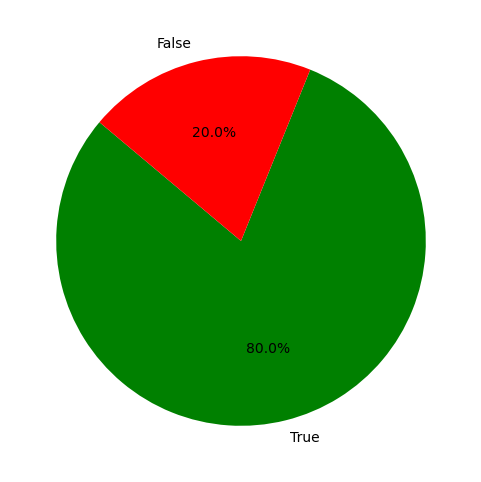

In [3]:
def check_price_increase(stock_codes):
    result = {}
    
    for code in stock_codes:
        df = fdr.DataReader(code,'2024-01-09','2024-01-10')
        print(df)
        if len(df) < 2:
            result[code] = False
        else:
            today_close = df['Change'].iloc[-1]

            if today_close >=  0:
                result[code] = True
            else:
                result[code] = False
    return result

pred_10_laps = ['000430', '067160', '071280', '239890', '281740']

result_TF = check_price_increase(pred_1)
result_TF = list(result_TF.values())

# True와 False의 개수를 세어 비율을 계산
true_count = sum(result_TF)
false_count = len(result_TF) - true_count

# 비율을 파이그래프로 표현
labels = ['True', 'False']
sizes = [true_count, false_count]
colors = ['green', 'red']

# 파이차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# 그래프 표시
plt.show() 

In [4]:
list_10 = ['019210', '067160', '000430', '300120', '071280',
           '239890', '241690', '182360', '232140', '281740',
           '105840', '086450', '119830', '276040', '348150',
           '069410', '105560', '030520', '239890', '053300',
           '105560', '228760', '352820', '263720', '047560',
           '253590', '020120', '142210', '281740', '053300',
           '407400', '089890', '030520', '033640', '065350',
           '389140', '086450', '228760', '000430', '067160',
           '033240', '092870', '065350', '000430', '010060',
           '071280', '003000', '297890', '298830', '039130'
           ]

def 중복된_값_찾고_정렬하기(lst):
    # 리스트에서 각 값의 개수를 세어줘
    count = Counter(lst)
    
    # 개수를 기준으로 내림차순으로 정렬해줘
    정렬된_값들 = sorted(count.items(), key=lambda x: x[1], reverse=True)
    
    # 중복된 값을 담을 리스트
    중복된_값 = []
    
    # 정렬된 값을 돌면서 중복된 값들을 리스트에 추가해줘
    for 값, 개수 in 정렬된_값들:
        if 개수 > 1:
            중복된_값.append((값, 개수))
    
    return 중복된_값

# 예시 리스트
결과 = 중복된_값_찾고_정렬하기(list_10)
print(결과)

[('000430', 3), ('067160', 2), ('071280', 2), ('239890', 2), ('281740', 2), ('086450', 2), ('105560', 2), ('030520', 2), ('053300', 2), ('228760', 2), ('065350', 2)]
